In [9]:
# Importing necessary libraries and dataset

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [15]:
# Exploring the dataset

In [17]:
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [19]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [21]:
# Forming as DataFrame

In [23]:
pd.set_option('display.precision',4)
pd.set_option('display.max_columns',9)
pd.set_option('display.width',None)

df = pd.DataFrame(housing.data, columns = housing.feature_names)

In [25]:
# setting up the target variable

In [27]:
df['med_houseValue'] = pd.Series(housing.target)

In [29]:
df.head()
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,med_houseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


In [31]:
# Creating random sample for further visualisation

In [33]:
sample_df = df.sample(frac = 0.1, random_state = 10)

In [35]:
sample_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,med_houseValue
20303,5.2783,12.0,4.4660,0.9806,405.0,3.9320,34.16,-119.18,1.674
16966,3.9722,27.0,4.6193,1.0964,1877.0,2.2056,37.55,-122.31,3.541
10623,4.5094,12.0,4.4264,1.0920,1913.0,1.9560,33.67,-117.77,1.602
6146,3.1034,29.0,4.5972,1.0370,2013.0,4.6597,34.11,-117.95,1.408
2208,4.6726,6.0,5.7303,1.0333,969.0,2.9364,36.81,-119.87,1.078
...,...,...,...,...,...,...,...,...,...
13636,2.3917,30.0,4.7637,1.0591,1034.0,4.3629,34.09,-117.32,0.786
10157,6.0076,19.0,6.1660,1.0038,3853.0,2.9345,33.91,-117.97,2.695
18823,1.7885,40.0,5.9168,1.1989,1467.0,2.6528,41.78,-121.62,0.435
495,5.3794,52.0,6.8610,1.1237,1316.0,2.2305,37.86,-122.25,3.769


In [37]:
# Visualisation using matplotlib

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
sns.set(font_scale = 2)
sns.set_style('whitegrid')

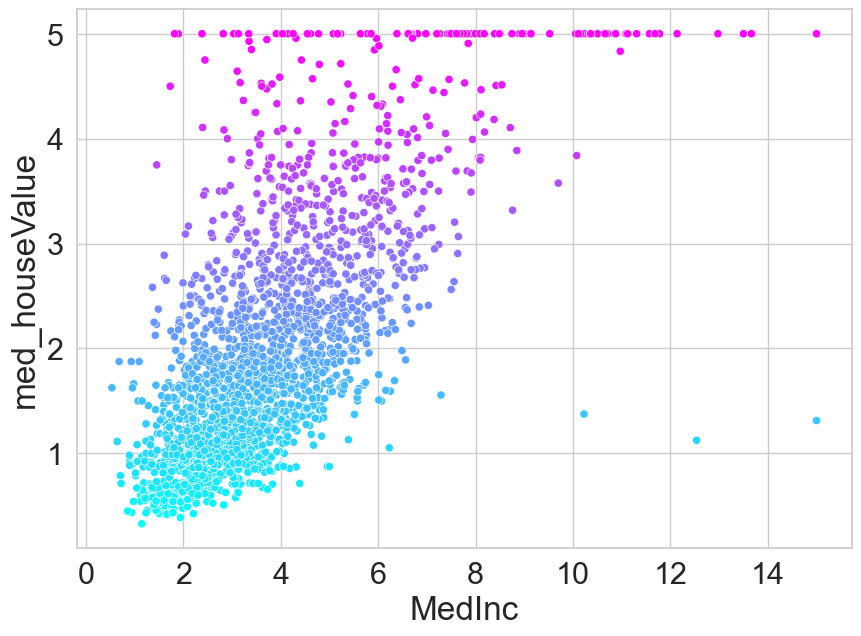

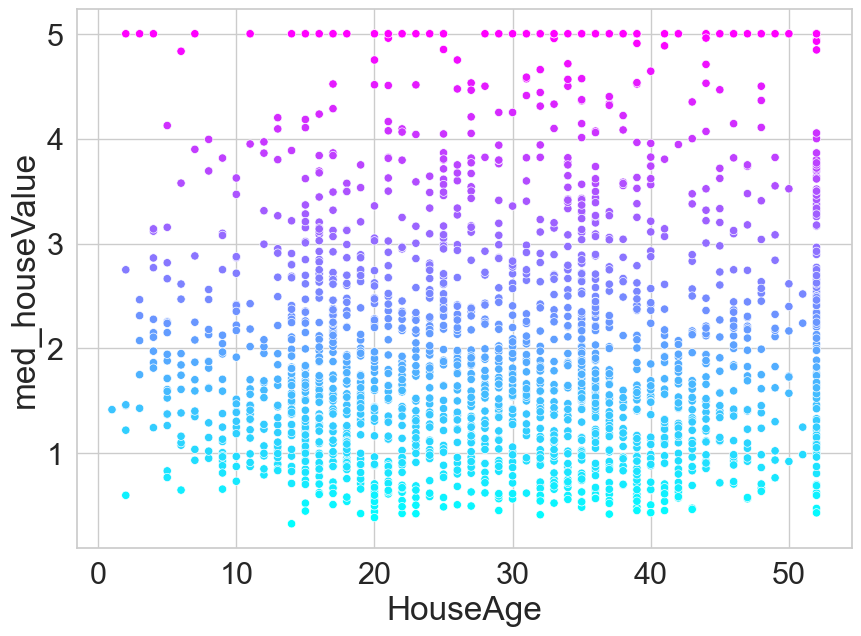

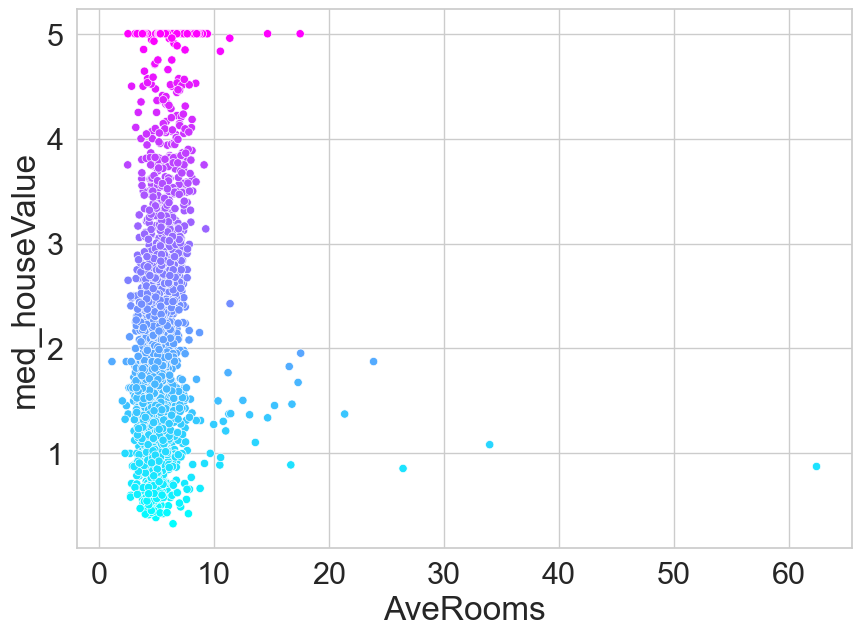

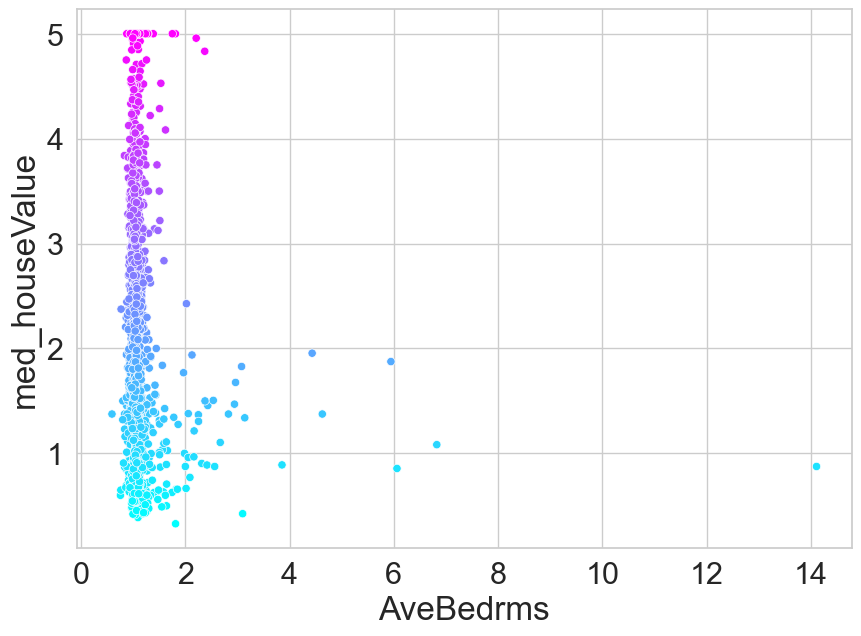

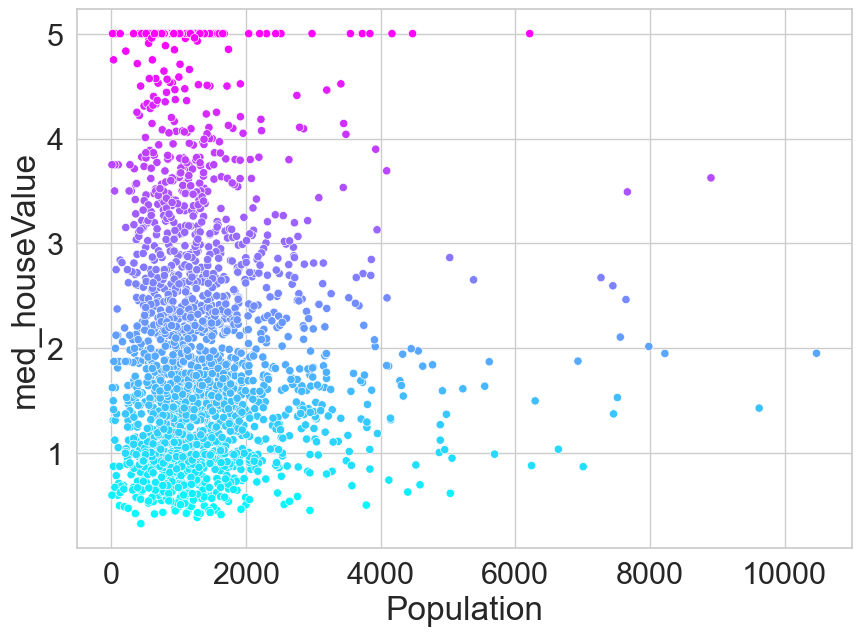

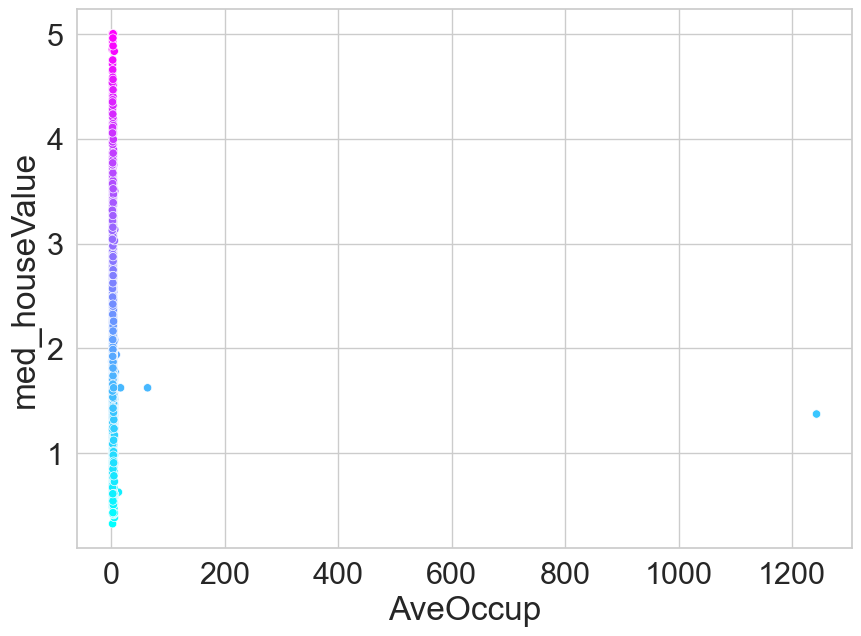

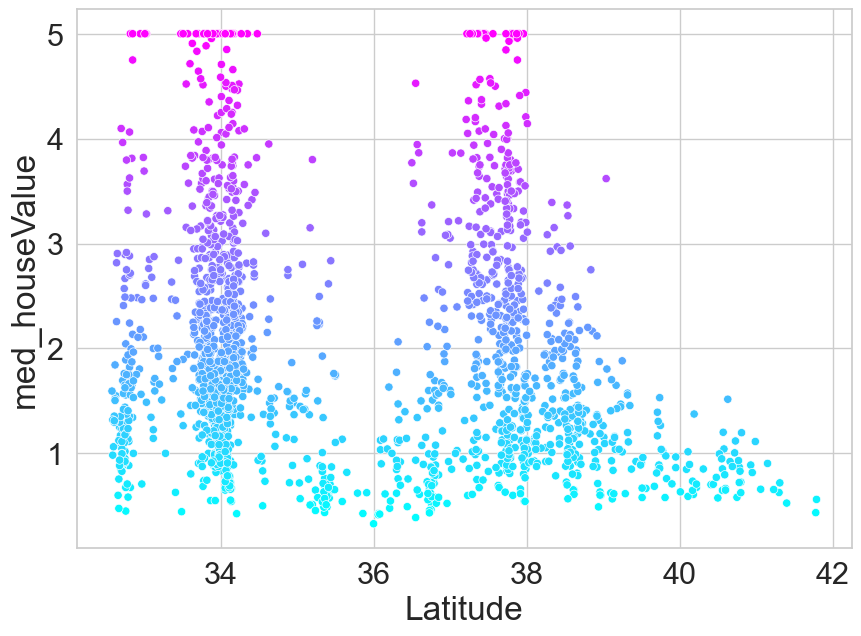

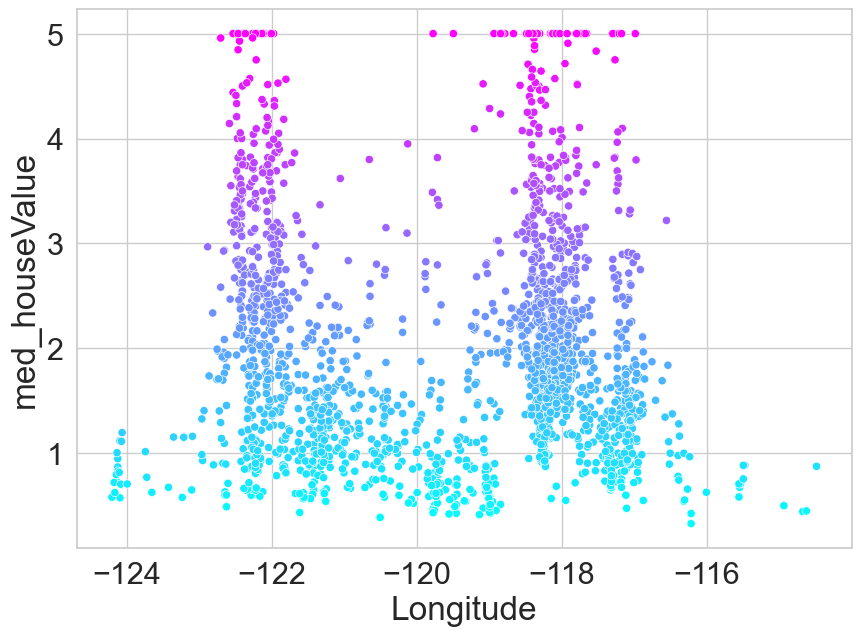

In [43]:
for feature in housing.feature_names:
    plt.figure(figsize = (10,7))
    sns.scatterplot(data = sample_df, x = feature, y = 'med_houseValue', hue = 'med_houseValue', palette = 'cool', legend = False)

In [44]:
# here some outliers can easily be spotted by just looking at the above plots

In [45]:
sample_df = sample_df[df['AveRooms'] < 40]
sample_df = sample_df[df['AveBedrms'] < 8]
sample_df = sample_df[df['AveOccup'] < 20]

C:\Users\2580g\AppData\Local\Temp\ipykernel_21680\409558691.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sample_df = sample_df[df['AveRooms'] < 40]
C:\Users\2580g\AppData\Local\Temp\ipykernel_21680\409558691.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sample_df = sample_df[df['AveBedrms'] < 8]
C:\Users\2580g\AppData\Local\Temp\ipykernel_21680\409558691.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sample_df = sample_df[df['AveOccup'] < 20]


In [46]:
sample_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,med_houseValue
20303,5.2783,12.0,4.4660,0.9806,405.0,3.9320,34.16,-119.18,1.674
16966,3.9722,27.0,4.6193,1.0964,1877.0,2.2056,37.55,-122.31,3.541
10623,4.5094,12.0,4.4264,1.0920,1913.0,1.9560,33.67,-117.77,1.602
6146,3.1034,29.0,4.5972,1.0370,2013.0,4.6597,34.11,-117.95,1.408
2208,4.6726,6.0,5.7303,1.0333,969.0,2.9364,36.81,-119.87,1.078
...,...,...,...,...,...,...,...,...,...
13636,2.3917,30.0,4.7637,1.0591,1034.0,4.3629,34.09,-117.32,0.786
10157,6.0076,19.0,6.1660,1.0038,3853.0,2.9345,33.91,-117.97,2.695
18823,1.7885,40.0,5.9168,1.1989,1467.0,2.6528,41.78,-121.62,0.435
495,5.3794,52.0,6.8610,1.1237,1316.0,2.2305,37.86,-122.25,3.769


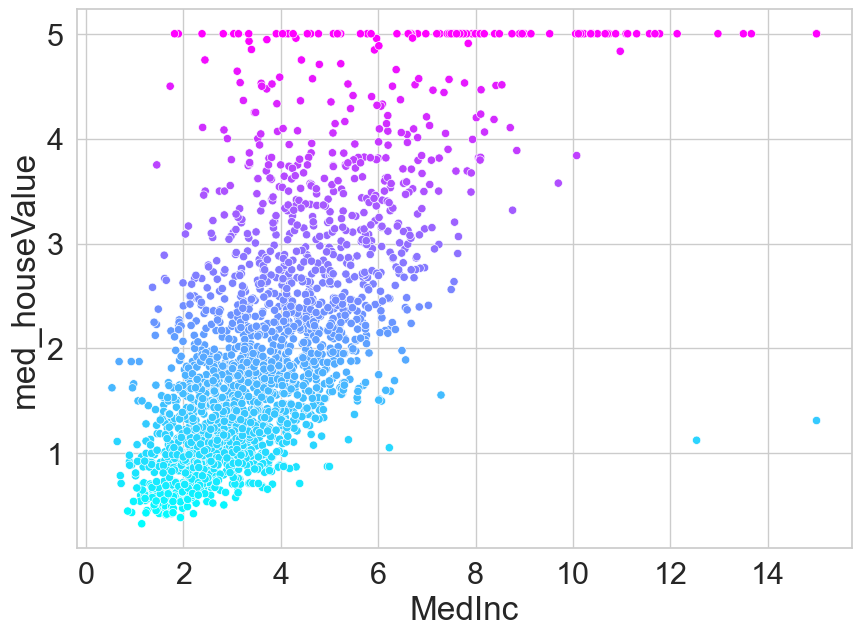

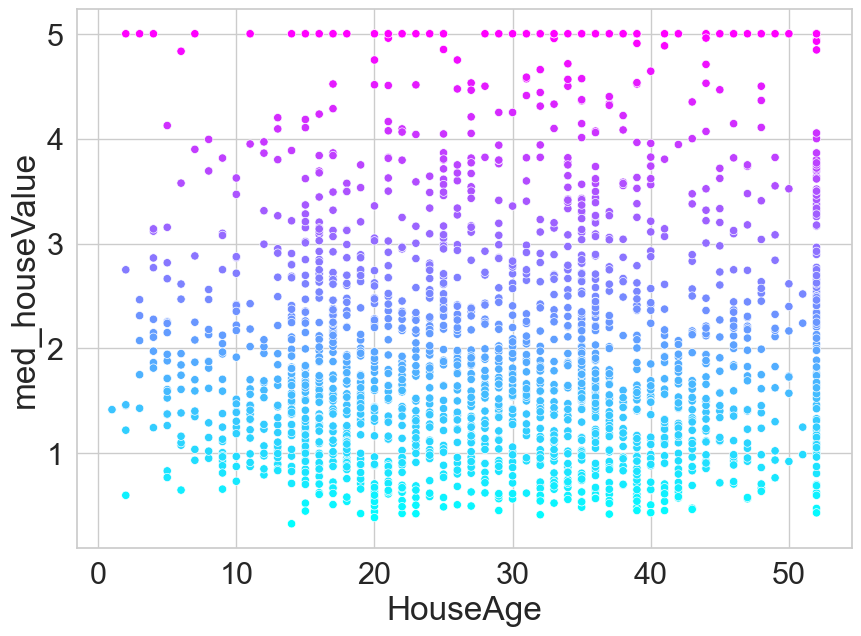

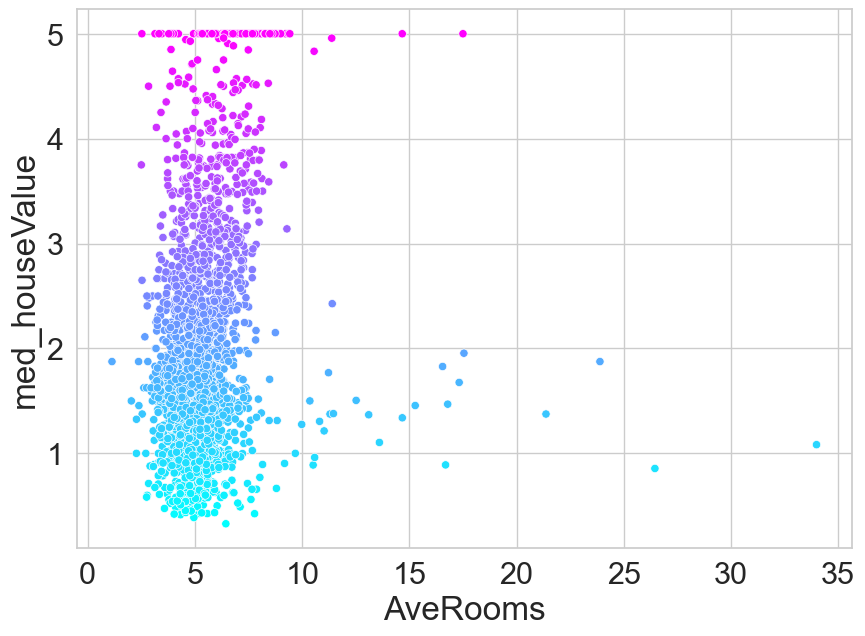

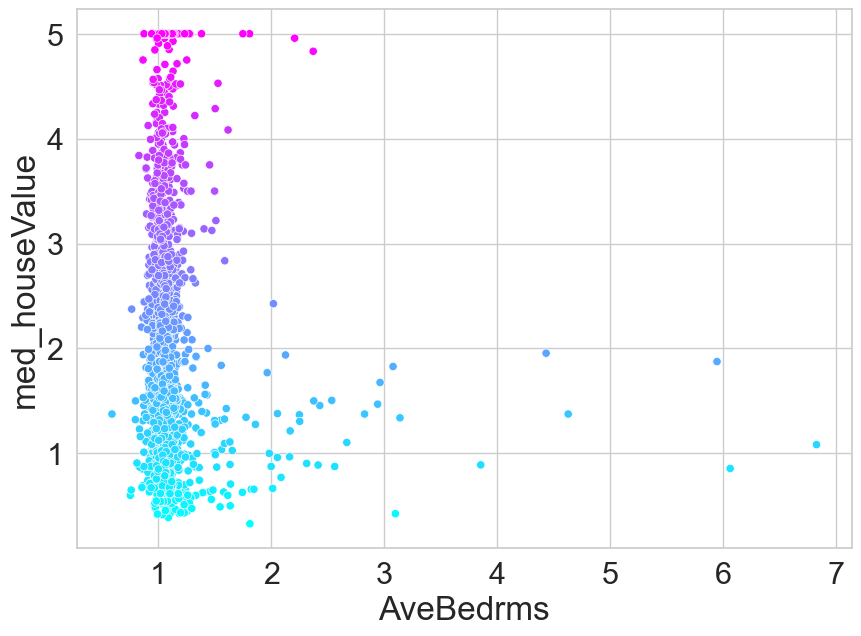

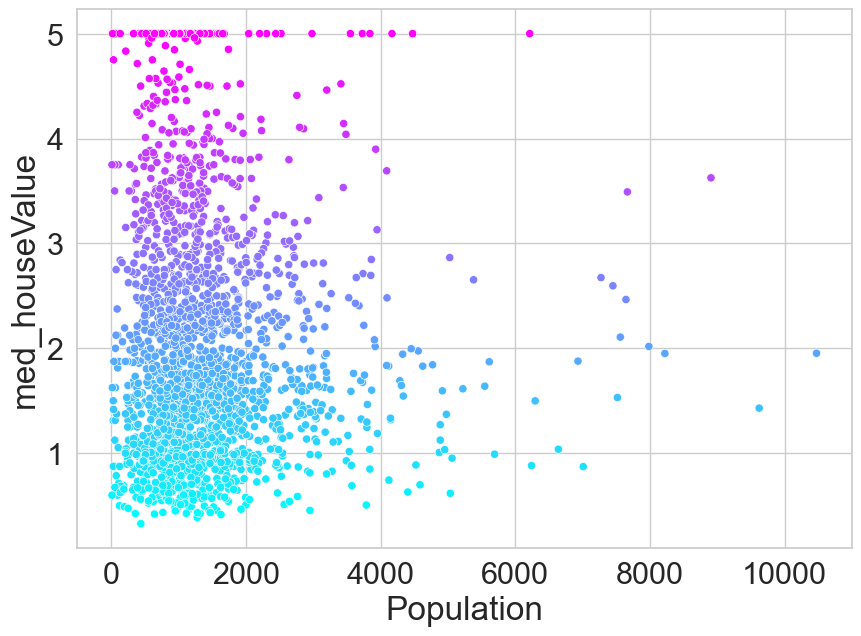

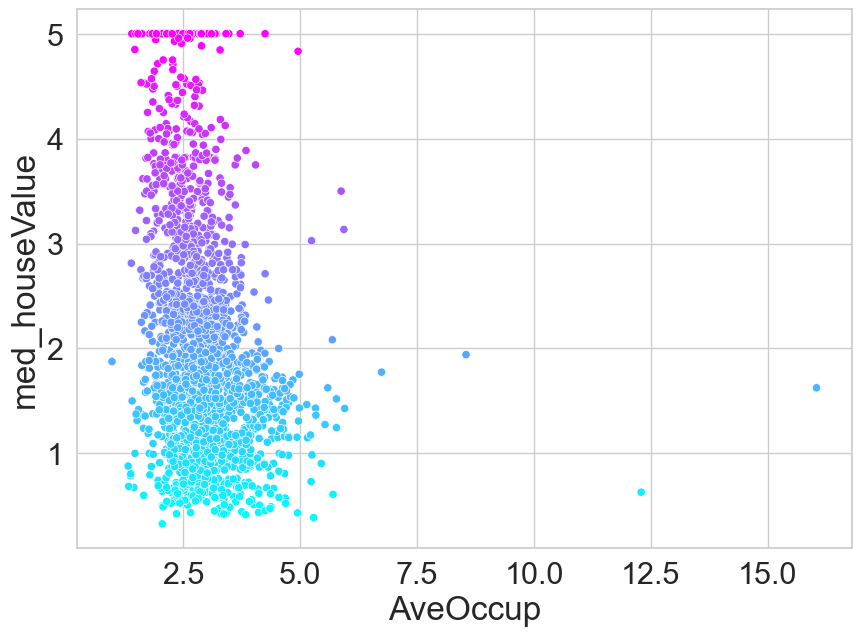

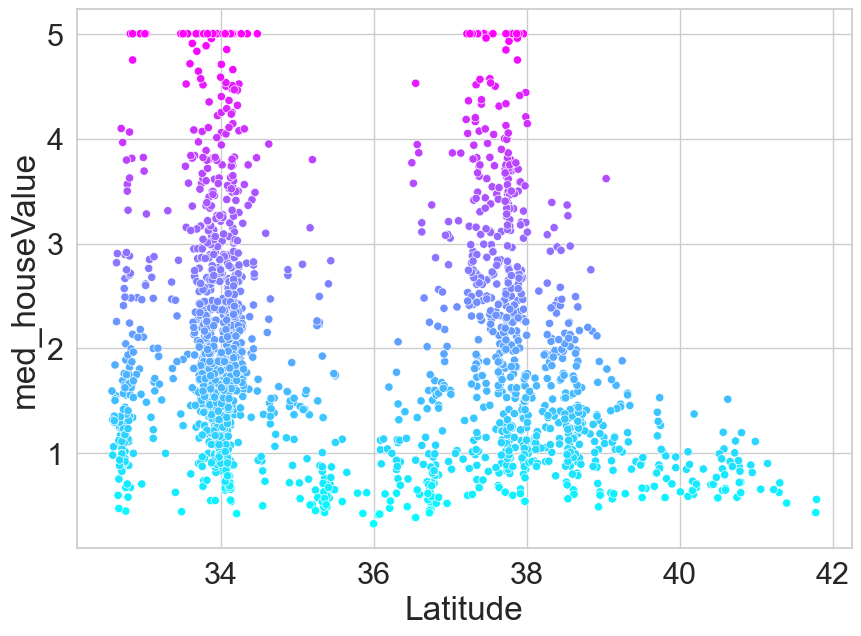

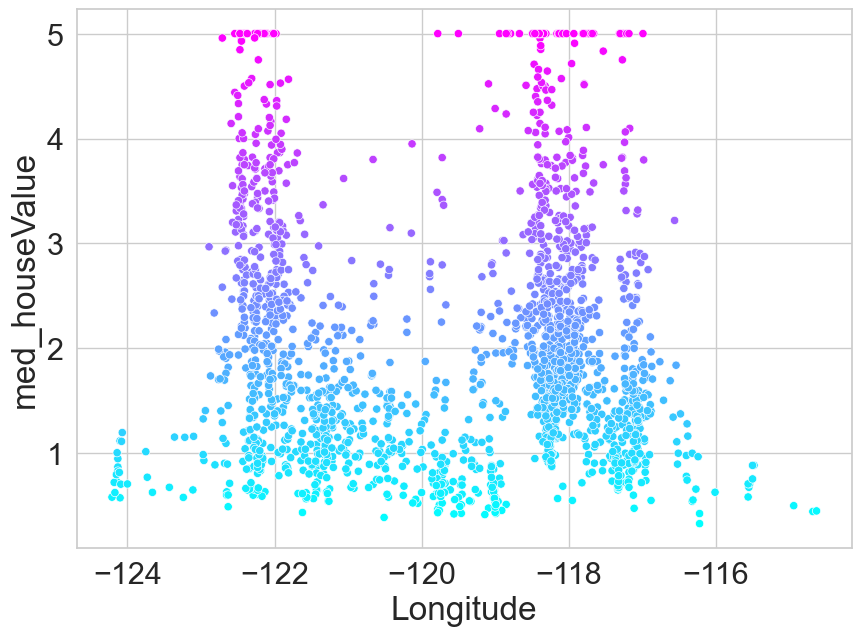

In [47]:
for feature in housing.feature_names:
    plt.figure(figsize = (10,7))
    sns.scatterplot(data = sample_df, x = feature, y = 'med_houseValue', hue = 'med_houseValue', palette = 'cool', legend = False)

In [48]:
# The data seems to be in a comparitively better state than before

In [49]:
# Splitting the data for testing and training

In [50]:
from sklearn.model_selection import train_test_split

x_Train, x_Test, y_Train, y_Test = train_test_split(housing.data, housing.target, random_state = 5)

In [51]:
print(x_Train.shape)
print(x_Test.shape)

(15480, 8)
(5160, 8)


In [52]:
# Training the model

In [57]:
from sklearn.linear_model import LinearRegression

linear_regression =  LinearRegression()
linear_regression.fit(X = x_Train, y = y_Train)

for i,name in enumerate(housing.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')

    MedInc: 0.43877607244383365
  HouseAge: 0.0090161912110214
  AveRooms: -0.11329294590046378
 AveBedrms: 0.6845635792058005
Population: -3.675501339722271e-06
  AveOccup: -0.004017840453149645
  Latitude: -0.42180959337936236
 Longitude: -0.4354466924698164


In [58]:
print(linear_regression.intercept_)

-37.04587691577721


In [59]:
predicted = linear_regression.predict(x_Test)
expected = y_Test

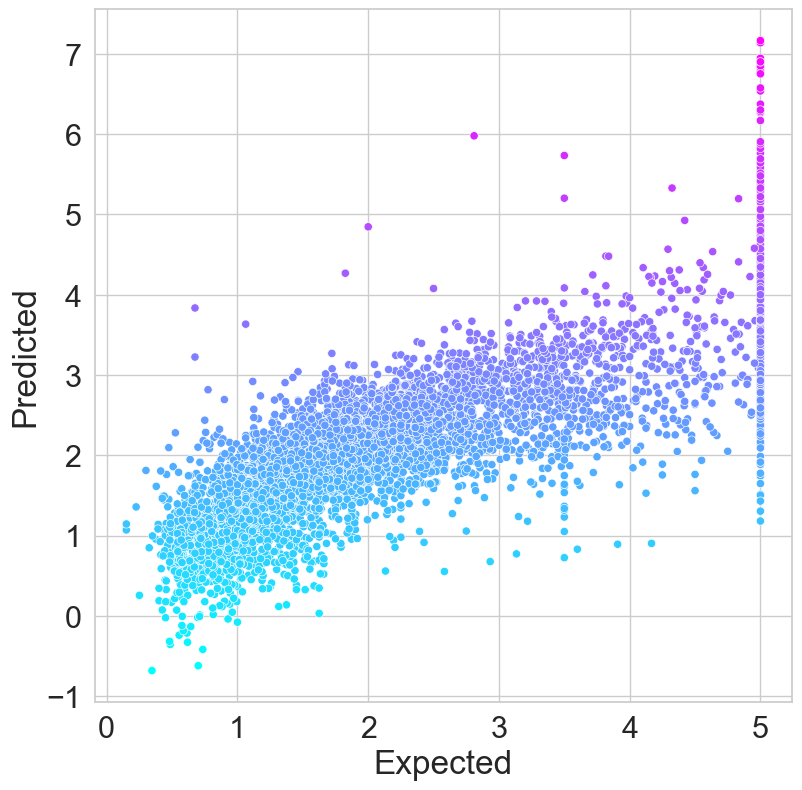

In [60]:
# Visualising Expected vs Predicted Prices

df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize = (9,9))
axes = sns.scatterplot(data = df, x = 'Expected', y = 'Predicted', hue = 'Predicted', palette = 'cool', legend = False)

In [61]:
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())

print(f'X-limit {axes.set_xlim(start,end)}')
print(f'Y-limit {axes.set_ylim(start,end)}')

X-limit (-0.6832758022166843, 7.165818111956185)
Y-limit (-0.6832758022166843, 7.165818111956185)


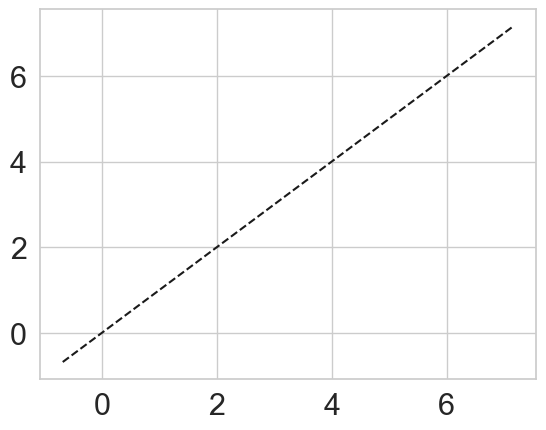

In [62]:
line = plt.plot([start,end], [start,end],'k--')

In [63]:
# Calculation of Evaluation Metrics

from sklearn import metrics
print(f'The R2 Score :{ metrics.r2_score(expected, predicted)}\n')
print(f'The MSE : {metrics.mean_squared_error(expected,predicted)}\n')

The R2 Score :0.609955912983551

The MSE : 0.5339441777835929



In [77]:
# choosing the best model
from sklearn.linear_model import ElasticNet, Lasso, Ridge

estimators = {
    'LinearRegression' : linear_regression,
    'ElasticNet' : ElasticNet(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge()}

from sklearn.model_selection import KFold, cross_val_score

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits = 10, random_state = 11, shuffle = True)
    scores = cross_val_score(estimator = estimator_object, X = housing.data, y = housing.target, cv = kfold, scoring = 'r2')
    print(f'{estimator_name :>16}: ' +  f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.599
      ElasticNet: mean of r2 scores=0.423
           Lasso: mean of r2 scores=0.285
           Ridge: mean of r2 scores=0.599
